In [5]:
import tensorflow as tf
import numpy as np

In [6]:
# Load the MNIST dataset (handwritten digits 0–9)
# The dataset is split into training and test sets
mnist=tf.keras.datasets.mnist # Built-in dataset in TensorFlow


In [20]:
# training_data: 60,000 images (28x28 pixels)
# test_data: 10,000 images for testing
(training_data, training_labels), (test_data, test_labels) = mnist.load_data()
training_data, test_data = training_data / 255, test_data / 255   # Normalize pixel values to range 0–1 instead of 0–255 for faster and more effective training

In [21]:
# Build a Sequential neural network model
model = tf.keras.Sequential([
    # Flatten: converts each 28x28 image into a 1D vector of 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
     # Dense layer with 128 neurons, using ReLU activation for non-linearity
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
     # Softmax activation converts outputs to probability distribution
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),  # optimizer: Adam — a method that helps the model learn faster
              loss='sparse_categorical_crossentropy',  # loss:sparse categorical crossentropy — tells the model how wrong it is (for multi-class problems)
              metrics=['accuracy'])   # metrics: accuracy — shows how often the model guesses correctly

In [22]:
# Train the model for 5 passes (epochs) through the training data
model.fit(training_data, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9263 - loss: 0.2570
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9668 - loss: 0.1126
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9776 - loss: 0.0759
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9820 - loss: 0.0578
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0440


In [10]:
# Evaluate the model's performance on the test data and return loss and accuracy
model.evaluate(test_data, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0777


[0.07772833853960037, 0.9764999747276306]

In [19]:
# Use the trained model to make predictions on the test data
predictions = model.predict(test_data)
np.set_printoptions(suppress=True)
print(test_labels[7])
print(predictions[7])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
9
[0.0609097  0.1681729  0.10155641 0.083211   0.03981559 0.05266481
 0.04609871 0.15471002 0.12298968 0.16987115]


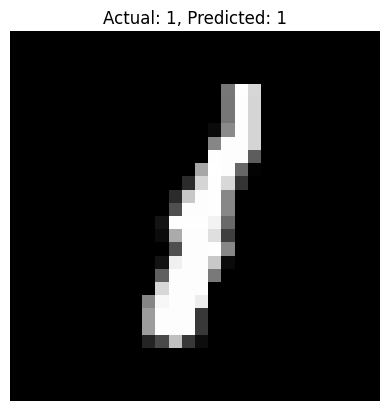

In [17]:
import matplotlib.pyplot as plt

# Pick an index to view
index = 89

# Show the image
plt.imshow(test_data[index], cmap='gray')
plt.title(f"Actual: {test_labels[index]}, Predicted: {np.argmax(predictions[index])}")
plt.axis('off')
plt.show()